In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/sensex.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0
4,2001-01-06,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
8481,2024-03-23,NaN,NaN,NaN,NaN,0
8482,2024-03-24,NaN,NaN,NaN,NaN,0
8483,2024-03-25,NaN,NaN,NaN,NaN,0
8484,2024-03-26,72396.968750,72705.289062,72363.031250,72470.296875,30600


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0
...,...,...,...,...,...,...
5720,2024-03-20,72036.859375,72402.671875,71674.421875,72101.687500,8300
5721,2024-03-21,72507.359375,72882.460938,72416.031250,72641.187500,12900
5722,2024-03-22,72231.656250,73115.617188,72172.093750,72831.937500,26100
5723,2024-03-26,72396.968750,72705.289062,72363.031250,72470.296875,30600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725 entries, 0 to 5724
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5725 non-null   datetime64[ns]
 1   Open    5725 non-null   float64       
 2   High    5725 non-null   float64       
 3   Low     5725 non-null   float64       
 4   Close   5725 non-null   float64       
 5   Volume  5725 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 268.5 KB


In [6]:
df.shape


(5725, 6)

In [7]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

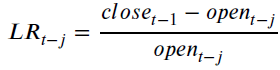

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [8]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b51

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,0.016609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,0.020726,0.027016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,-0.015690,0.034642,0.041017,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,0.016371,0.000660,0.051828,0.058309,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,2024-03-20,72036.859375,72402.671875,71674.421875,72101.687500,8300,-0.006222,-0.007925,-0.012001,-0.007690,-0.026777,-0.008475,0.017060,0.066736,0.190930
5721,2024-03-21,72507.359375,72882.460938,72416.031250,72641.187500,12900,0.000900,-0.004985,-0.006690,-0.010771,-0.006455,-0.008610,0.009300,0.073123,0.216704
5722,2024-03-22,72231.656250,73115.617188,72172.093750,72831.937500,26100,0.001846,0.008389,0.002460,0.000742,-0.003369,-0.008548,0.016255,0.074144,0.230502
5723,2024-03-26,72396.968750,72705.289062,72363.031250,72470.296875,30600,0.008311,0.004476,0.011037,0.005092,0.003370,0.002125,0.016529,0.076442,0.252080


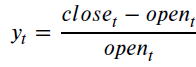

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [9]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016609
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,0.016609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020726
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,0.020726,0.027016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015690
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,-0.015690,0.034642,0.041017,NaN,NaN,NaN,NaN,NaN,NaN,0.016371
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,0.016371,0.000660,0.051828,0.058309,NaN,NaN,NaN,NaN,NaN,-0.010644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,2024-03-20,72036.859375,72402.671875,71674.421875,72101.687500,8300,-0.006222,-0.007925,-0.012001,-0.007690,-0.026777,-0.008475,0.017060,0.066736,0.190930,0.000900
5721,2024-03-21,72507.359375,72882.460938,72416.031250,72641.187500,12900,0.000900,-0.004985,-0.006690,-0.010771,-0.006455,-0.008610,0.009300,0.073123,0.216704,0.001846
5722,2024-03-22,72231.656250,73115.617188,72172.093750,72831.937500,26100,0.001846,0.008389,0.002460,0.000742,-0.003369,-0.008548,0.016255,0.074144,0.230502,0.008311
5723,2024-03-26,72396.968750,72705.289062,72363.031250,72470.296875,30600,0.008311,0.004476,0.011037,0.005092,0.003370,0.002125,0.016529,0.076442,0.252080,0.001013


In [10]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2002-01-09,3440.439941,3466.729980,3392.610107,3400.889893,0,0.008866,0.017959,0.034370,0.047248,0.059787,-0.000808,0.244144,0.043063,-0.130385,-0.011496
253,2002-01-10,3396.090088,3413.250000,3371.909912,3381.959961,0,-0.011496,-0.001960,0.007036,0.023270,0.036010,-0.009590,0.219350,0.024013,-0.144985,-0.004161
254,2002-01-11,3381.409912,3401.800049,3298.850098,3362.879883,0,-0.004161,-0.016998,-0.007516,0.001430,0.017575,-0.018362,0.221837,0.019390,-0.191106,-0.005480
255,2002-01-14,3373.689941,3446.919922,3373.689941,3407.840088,0,-0.005480,-0.009779,-0.022544,-0.013115,-0.004220,-0.022527,0.213068,0.021888,-0.183041,0.010122
256,2002-01-15,3405.899902,3413.020020,3340.010010,3352.520020,0,0.010122,0.007816,0.003460,-0.009475,0.000079,-0.008294,0.201323,0.032372,-0.181744,-0.015673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,2024-03-20,72036.859375,72402.671875,71674.421875,72101.687500,8300,-0.006222,-0.007925,-0.012001,-0.007690,-0.026777,-0.008475,0.017060,0.066736,0.190930,0.000900
5721,2024-03-21,72507.359375,72882.460938,72416.031250,72641.187500,12900,0.000900,-0.004985,-0.006690,-0.010771,-0.006455,-0.008610,0.009300,0.073123,0.216704,0.001846
5722,2024-03-22,72231.656250,73115.617188,72172.093750,72831.937500,26100,0.001846,0.008389,0.002460,0.000742,-0.003369,-0.008548,0.016255,0.074144,0.230502,0.008311
5723,2024-03-26,72396.968750,72705.289062,72363.031250,72470.296875,30600,0.008311,0.004476,0.011037,0.005092,0.003370,0.002125,0.016529,0.076442,0.252080,0.001013


In [11]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [12]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (3831, 9)
y_train:  (3831,)
x_valid:  (820, 9)
y_valid:  (820,)
x_test:  (822, 9)
y_test:  (822,)


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
best_svr = grid_search.best_estimator_

In [15]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 1, 'epsilon': 0.01, 'gamma': 0.0001}


In [16]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [17]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 1, 'epsilon': 0.01, 'gamma': 0.0001}


In [18]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [19]:
print("Train RMSE (SVR): ",train_rmse)
print("Validation RMSE (SVR): ",valid_rmse)
print("Test RMSE (SVR): ",test_rmse)


Train RMSE (SVR):  0.012586246369426627
Validation RMSE (SVR):  0.010743135214606842
Test RMSE (SVR):  0.007531583429867204


In [20]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-20-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
4083,2017-07-26,32255.990234,32413.630859,32226.080078,32382.460938,12400,-0.003785,0.003989,0.006005,0.006070,0.010836,0.033134,0.073195,0.183441,0.159705,0.003921,-0.000680
4084,2017-07-27,32519.439453,32672.660156,32325.330078,32383.300781,10900,0.003921,0.000981,0.008792,0.010818,0.010884,0.044971,0.074352,0.199753,0.165856,-0.004186,-0.000689
4085,2017-07-28,32381.359375,32381.359375,32104.660156,32309.880859,11300,-0.004186,0.003947,0.001007,0.008819,0.010845,0.047631,0.077124,0.191838,0.157370,-0.002207,-0.000682
4086,2017-07-31,32412.199219,32546.500000,32324.449219,32514.939453,13100,-0.002207,-0.006444,0.001671,-0.001262,0.006531,0.048172,0.076225,0.176495,0.165508,0.003170,-0.000682
4087,2017-08-01,32579.800781,32632.019531,32462.250000,32575.169922,9000,0.003170,0.004125,-0.000138,0.008028,0.005077,0.043616,0.084375,0.171244,0.171542,-0.000142,-0.000687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,2020-11-19,43902.238281,44230.000000,43518.109375,43599.960938,24100,0.004581,0.001909,0.020350,0.020516,0.016941,0.093017,0.154011,0.433357,0.093344,-0.006885,-0.000741
4899,2020-11-20,43732.140625,44013.019531,43453.750000,43882.250000,17100,-0.006885,-0.008609,-0.011246,0.006953,0.007116,0.069488,0.133293,0.412635,0.078377,0.003432,-0.000720
4900,2020-11-23,44164.171875,44271.148438,43747.218750,44077.148438,17800,0.003432,-0.000455,-0.002190,-0.004844,0.013472,0.082675,0.137820,0.425067,0.084708,-0.001970,-0.000731
4901,2020-11-24,44341.191406,44601.628906,44247.121094,44523.019531,17900,-0.001970,0.007889,0.003984,0.002241,-0.000424,0.082222,0.131679,0.384863,0.082184,0.004101,-0.000714


In [21]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-21-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4083,2017-07-26,32255.990234,32413.630859,32226.080078,32382.460938,12400,-0.003785,0.003989,0.006005,0.006070,0.010836,0.033134,0.073195,0.183441,0.159705,0.003921,-0.000680,32234.040692
4084,2017-07-27,32519.439453,32672.660156,32325.330078,32383.300781,10900,0.003921,0.000981,0.008792,0.010818,0.010884,0.044971,0.074352,0.199753,0.165856,-0.004186,-0.000689,32497.029955
4085,2017-07-28,32381.359375,32381.359375,32104.660156,32309.880859,11300,-0.004186,0.003947,0.001007,0.008819,0.010845,0.047631,0.077124,0.191838,0.157370,-0.002207,-0.000682,32359.280253
4086,2017-07-31,32412.199219,32546.500000,32324.449219,32514.939453,13100,-0.002207,-0.006444,0.001671,-0.001262,0.006531,0.048172,0.076225,0.176495,0.165508,0.003170,-0.000682,32390.090807
4087,2017-08-01,32579.800781,32632.019531,32462.250000,32575.169922,9000,0.003170,0.004125,-0.000138,0.008028,0.005077,0.043616,0.084375,0.171244,0.171542,-0.000142,-0.000687,32557.418160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,2020-11-19,43902.238281,44230.000000,43518.109375,43599.960938,24100,0.004581,0.001909,0.020350,0.020516,0.016941,0.093017,0.154011,0.433357,0.093344,-0.006885,-0.000741,43869.688323
4899,2020-11-20,43732.140625,44013.019531,43453.750000,43882.250000,17100,-0.006885,-0.008609,-0.011246,0.006953,0.007116,0.069488,0.133293,0.412635,0.078377,0.003432,-0.000720,43700.660294
4900,2020-11-23,44164.171875,44271.148438,43747.218750,44077.148438,17800,0.003432,-0.000455,-0.002190,-0.004844,0.013472,0.082675,0.137820,0.425067,0.084708,-0.001970,-0.000731,44131.872802
4901,2020-11-24,44341.191406,44601.628906,44247.121094,44523.019531,17900,-0.001970,0.007889,0.003984,0.002241,-0.000424,0.082222,0.131679,0.384863,0.082184,0.004101,-0.000714,44309.548585


In [22]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=c8b18494c3e8ed8f388ab86a1ef75c77b669cb52c02d8c58109a8ac5fc5e736c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [23]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0003 ± 0.0005,LR_126
0.0001 ± 0.0004,LR_63
0.0001 ± 0.0007,LR_252
0.0000 ± 0.0000,LR_1
0.0000 ± 0.0000,LR_5
0.0000 ± 0.0000,LR_2
-0.0000 ± 0.0000,LR_3
-0.0000 ± 0.0000,LR_4
-0.0000 ± 0.0000,LR_21


In [24]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_126', 'LR_63', 'LR_252', 'LR_1', 'LR_5', 'LR_2', 'LR_3', 'LR_4', 'LR_21']


In [25]:
validation_set_pi=validation_set.copy()
features_to_drop = ['Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
4083,2017-07-26,32255.990234,32413.630859,32226.080078,32382.460938,12400,-0.003785,0.003989,0.006005,0.006070,0.010836,0.033134,0.073195,0.183441,0.159705,0.003921
4084,2017-07-27,32519.439453,32672.660156,32325.330078,32383.300781,10900,0.003921,0.000981,0.008792,0.010818,0.010884,0.044971,0.074352,0.199753,0.165856,-0.004186
4085,2017-07-28,32381.359375,32381.359375,32104.660156,32309.880859,11300,-0.004186,0.003947,0.001007,0.008819,0.010845,0.047631,0.077124,0.191838,0.157370,-0.002207
4086,2017-07-31,32412.199219,32546.500000,32324.449219,32514.939453,13100,-0.002207,-0.006444,0.001671,-0.001262,0.006531,0.048172,0.076225,0.176495,0.165508,0.003170
4087,2017-08-01,32579.800781,32632.019531,32462.250000,32575.169922,9000,0.003170,0.004125,-0.000138,0.008028,0.005077,0.043616,0.084375,0.171244,0.171542,-0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,2020-11-19,43902.238281,44230.000000,43518.109375,43599.960938,24100,0.004581,0.001909,0.020350,0.020516,0.016941,0.093017,0.154011,0.433357,0.093344,-0.006885
4899,2020-11-20,43732.140625,44013.019531,43453.750000,43882.250000,17100,-0.006885,-0.008609,-0.011246,0.006953,0.007116,0.069488,0.133293,0.412635,0.078377,0.003432
4900,2020-11-23,44164.171875,44271.148438,43747.218750,44077.148438,17800,0.003432,-0.000455,-0.002190,-0.004844,0.013472,0.082675,0.137820,0.425067,0.084708,-0.001970
4901,2020-11-24,44341.191406,44601.628906,44247.121094,44523.019531,17900,-0.001970,0.007889,0.003984,0.002241,-0.000424,0.082222,0.131679,0.384863,0.082184,0.004101


In [26]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [29]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.01071054835107623


In [30]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

3.2586863530612714e-05

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [32]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.010708107063216626, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.010710552980742612, ('LR_1', 'LR_2', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.01071026470268012, ('LR_1', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 0.010707876860942876, ('LR_1', 'LR_63', 'LR_126', 'LR_252'): 0.010709370685442782, ('LR_63', 'LR_126', 'LR_252'): 0.010709275812130468, ('LR_63', 'LR_126'): 0.010705767834102615, ('LR_126',): 0.01072138003141055}


In [33]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 3.5028151390215784e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 3.2582233864229815e-05, ('LR_1', 'LR_2', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 3.2870511926722315e-05, ('LR_1', 'LR_5', 'LR_63', 'LR_126', 'LR_252'): 3.5258353663965986e-05, ('LR_1', 'LR_63', 'LR_126', 'LR_252'): 3.3764529164060156e-05, ('LR_63', 'LR_126', 'LR_252'): 3.3859402476374076e-05, ('LR_63', 'LR_126'): 3.736738050422704e-05, ('LR_126',): 2.1755183196291508e-05}


In [34]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_63', 'LR_126')
Maximum Loss Difference: 3.736738050422704e-05


In [35]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-35-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.0075117644661746325


In [38]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-38-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4903,2020-11-26,43967.589844,44361.781250,43582.398438,44259.738281,14600,-0.020595,-0.011571,-0.007610,0.002194,-0.001689,0.090276,0.115402,0.331916,0.078098,0.006645,-0.000686,43937.420039
4904,2020-11-27,44325.031250,44407.281250,43995.410156,44149.718750,15700,0.006645,-0.010950,-0.001837,0.002164,0.012064,0.088416,0.127221,0.323154,0.094464,-0.003955,-0.000702,44293.915229
4905,2020-12-01,44435.828125,44730.789062,44118.101562,44655.441406,16000,-0.003955,0.004142,-0.013408,-0.004318,-0.000327,0.116664,0.106838,0.291478,0.076223,0.004942,-0.000673,44405.938323
4906,2020-12-02,44729.519531,44729.640625,44169.968750,44618.039062,16000,0.004942,0.007454,0.015645,-0.002107,0.007087,0.122565,0.152280,0.310601,0.089705,-0.002492,-0.000702,44698.103752
4907,2020-12-03,44902.019531,44953.011719,44551.421875,44632.648438,30700,-0.002492,0.004101,0.006610,0.014794,-0.002943,0.118797,0.147210,0.304676,0.083974,-0.005999,-0.000692,44870.936627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,2024-03-20,72036.859375,72402.671875,71674.421875,72101.687500,8300,-0.006222,-0.007925,-0.012001,-0.007690,-0.026777,-0.008475,0.017060,0.066736,0.190930,0.000900,-0.000645,71990.424671
5721,2024-03-21,72507.359375,72882.460938,72416.031250,72641.187500,12900,0.000900,-0.004985,-0.006690,-0.010771,-0.006455,-0.008610,0.009300,0.073123,0.216704,0.001846,-0.000661,72459.401852
5722,2024-03-22,72231.656250,73115.617188,72172.093750,72831.937500,26100,0.001846,0.008389,0.002460,0.000742,-0.003369,-0.008548,0.016255,0.074144,0.230502,0.008311,-0.000671,72183.159086
5723,2024-03-26,72396.968750,72705.289062,72363.031250,72470.296875,30600,0.008311,0.004476,0.011037,0.005092,0.003370,0.002125,0.016529,0.076442,0.252080,0.001013,-0.000685,72347.406035


In [39]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-39-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-40-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4903,2020-11-26,43967.589844,44361.781250,43582.398438,44259.738281,14600,-0.020595,-0.011571,-0.007610,0.002194,-0.001689,0.090276,0.115402,0.331916,0.078098,0.006645,-0.000686,43937.420039
4904,2020-11-27,44325.031250,44407.281250,43995.410156,44149.718750,15700,0.006645,-0.010950,-0.001837,0.002164,0.012064,0.088416,0.127221,0.323154,0.094464,-0.003955,-0.000702,44293.915229
4905,2020-12-01,44435.828125,44730.789062,44118.101562,44655.441406,16000,-0.003955,0.004142,-0.013408,-0.004318,-0.000327,0.116664,0.106838,0.291478,0.076223,0.004942,-0.000673,44405.938323
4906,2020-12-02,44729.519531,44729.640625,44169.968750,44618.039062,16000,0.004942,0.007454,0.015645,-0.002107,0.007087,0.122565,0.152280,0.310601,0.089705,-0.002492,-0.000702,44698.103752
4907,2020-12-03,44902.019531,44953.011719,44551.421875,44632.648438,30700,-0.002492,0.004101,0.006610,0.014794,-0.002943,0.118797,0.147210,0.304676,0.083974,-0.005999,-0.000692,44870.936627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,2024-03-20,72036.859375,72402.671875,71674.421875,72101.687500,8300,-0.006222,-0.007925,-0.012001,-0.007690,-0.026777,-0.008475,0.017060,0.066736,0.190930,0.000900,-0.000645,71990.424671
5721,2024-03-21,72507.359375,72882.460938,72416.031250,72641.187500,12900,0.000900,-0.004985,-0.006690,-0.010771,-0.006455,-0.008610,0.009300,0.073123,0.216704,0.001846,-0.000661,72459.401852
5722,2024-03-22,72231.656250,73115.617188,72172.093750,72831.937500,26100,0.001846,0.008389,0.002460,0.000742,-0.003369,-0.008548,0.016255,0.074144,0.230502,0.008311,-0.000671,72183.159086
5723,2024-03-26,72396.968750,72705.289062,72363.031250,72470.296875,30600,0.008311,0.004476,0.011037,0.005092,0.003370,0.002125,0.016529,0.076442,0.252080,0.001013,-0.000685,72347.406035


In [41]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

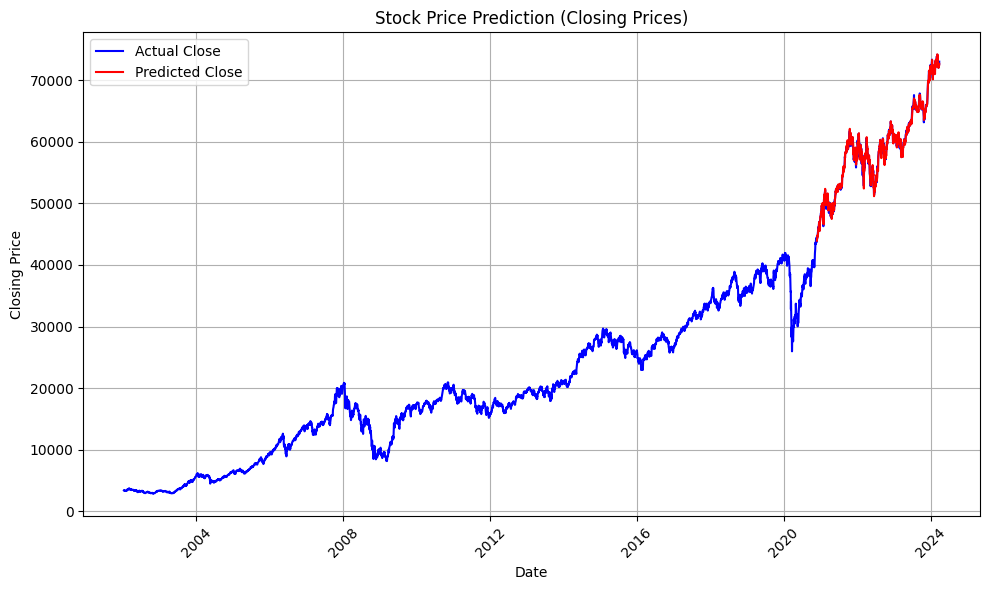

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Datasets to carry out the rest of the study (15-20 Datasets)

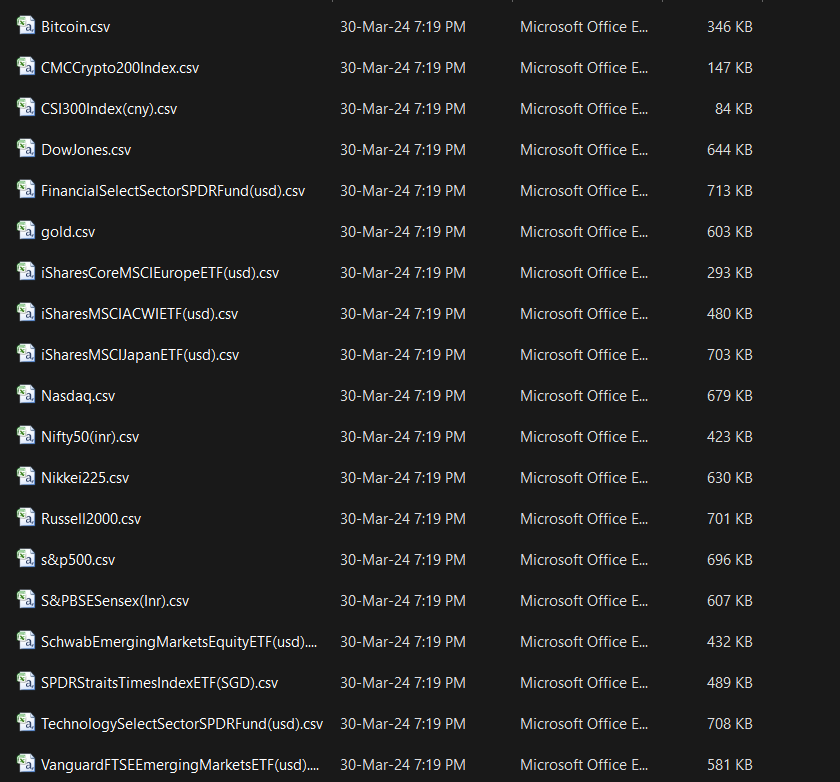

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (GBDT): 0.01237438357136908
Validation RMSE (GBDT): 0.010842462676609712
Test RMSE (GBDT): 0.007547183385608668


In [44]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Train RMSE (XGBoost): 0.012159294776387178
Validation RMSE (XGBoost): 0.010703718310828551
Test RMSE (XGBoost): 0.0075464223447148674


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
